In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
data = pd.read_csv(r"C:\Users\nmadh\OneDrive\Desktop\Project\genres_v2.csv")

In [4]:
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence  ...                      id  \
0          0.013400    0.0556   0.3890  ...  2Vc6NJ9PW9gD9q343XFRKx   
1          0.000000    0.1180   0.1240  ...  7pgJBLVz5VmnL7uGHmRj6p   
2          0.000004    0.3720   0.0391  ...  0vSWgAlfpye0WCGeNmuNhy   
3          0.000000    0.1140   0.1750  ...  0VSXnJqQkwuH2ei1nOQ1nu   
4          0.000000    0.1660   0.5910  ...  4jCeguq9rMTlbMmPHuO7S3   

                                    uri  \
0  spotify:track:2Vc6NJ9PW9gD9q343XFRKx   
1  spotify:track:7pgJBLVz5VmnL7uGHmRj6p   
2  spotify:track:0vSWgAlfpye0WCGeNmuNhy   
3  spotify:track:0VSXnJqQkwuH2ei1nOQ1nu   
4  spotify:track:4jCeguq9rMTlbMmPHuO7S3   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...   
1  https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...   
2  https://api.spotify.com/v1/tracks/0vSWgAlfpye0...   
3  https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...   
4  https://api.spotify.com/v1/tracks/4jCeguq9rMTl...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/2Vc6...      124539   
1  https://api.spotify.com/v1/audio-analysis/7pgJ...      224427   
2  https://api.spotify.com/v1/audio-analysis/0vSW...       98821   
3  https://api.spotify.com/v1/audio-analysis/0VSX...      123661   
4  https://api.spotify.com/v1/audio-analysis/4jCe...      123298   

  time_signature      genre                                      song_name  \
0              4  Dark Trap                            Mercury: Retrograde   
1              4  Dark Trap                                      Pathology   
2              4  Dark Trap                                       Symbiote   
3              3  Dark Trap  ProductOfDrugs (Prod. The Virus and Antidote)   
4              4  Dark Trap                                          Venom   

  Unnamed: 0 title  
0        NaN   NaN  
1        NaN   NaN  
2        NaN   NaN  
3        NaN   NaN  
4        NaN   NaN  

[5 rows x 22 columns]

In [5]:
data.shape

(42305, 22)

In [6]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre', 'song_name', 'Unnamed: 0', 'title'],
      dtype='object')

In [7]:
data.isnull().sum()

danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
type                    0
id                      0
uri                     0
track_href              0
analysis_url            0
duration_ms             0
time_signature          0
genre                   0
song_name           20786
Unnamed: 0          21525
title               21525
dtype: int64

In [8]:
data.drop(['title','Unnamed: 0','uri','track_href','analysis_url','id','song_name'],axis=1,inplace=True)

In [9]:
data['type'].unique()

array(['audio_features'], dtype=object)

In [10]:
data.drop('type',axis=1,inplace=True)

In [11]:
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.013400    0.0556   0.3890  156.985       124539               4   
1          0.000000    0.1180   0.1240  115.080       224427               4   
2          0.000004    0.3720   0.0391  218.050        98821               4   
3          0.000000    0.1140   0.1750  186.948       123661               3   
4          0.000000    0.1660   0.5910  147.988       123298               4   

       genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark Trap  
4  Dark Trap

In [12]:
data['genre'].value_counts()

Underground Rap    5875
Dark Trap          4578
Hiphop             3028
trance             2999
trap               2987
techhouse          2975
dnb                2966
psytrance          2961
techno             2956
hardstyle          2936
RnB                2099
Trap Metal         1956
Rap                1848
Emo                1680
Pop                 461
Name: genre, dtype: int64

In [13]:
import plotly.express as px
px.histogram(data.genre)

In [14]:
data_genre = data['genre'].value_counts()
px.pie(data_genre,names=data_genre.index,values=data_genre.values,labels=data_genre.index)

In [15]:
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.013400    0.0556   0.3890  156.985       124539               4   
1          0.000000    0.1180   0.1240  115.080       224427               4   
2          0.000004    0.3720   0.0391  218.050        98821               4   
3          0.000000    0.1140   0.1750  186.948       123661               3   
4          0.000000    0.1660   0.5910  147.988       123298               4   

       genre  
0  Dark Trap  
1  Dark Trap  
2  Dark Trap  
3  Dark Trap  
4  Dark Trap

<Axes: >

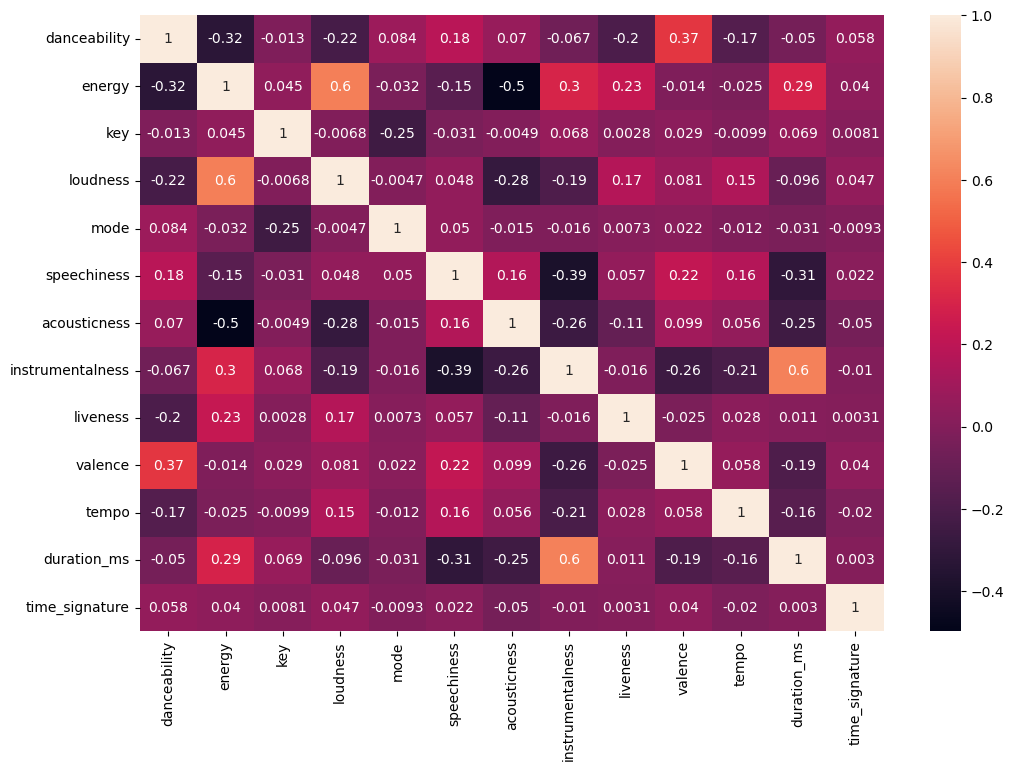

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [17]:
data['duration_min'] = data['duration_ms']/60000
data.drop('duration_ms',axis=1,inplace=True)
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  time_signature      genre  \
0          0.013400    0.0556   0.3890  156.985               4  Dark Trap   
1          0.000000    0.1180   0.1240  115.080               4  Dark Trap   
2          0.000004    0.3720   0.0391  218.050               4  Dark Trap   
3          0.000000    0.1140   0.1750  186.948               3  Dark Trap   
4          0.000000    0.1660   0.5910  147.988               4  Dark Trap   

   duration_min  
0      2.075650  
1      3.740450  
2      1.647017  
3      2.061017  
4      2.054967

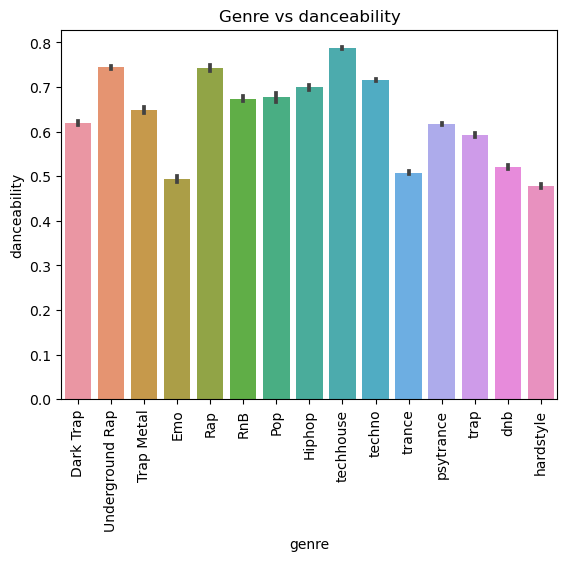

In [18]:
sns.barplot(x='genre',y='danceability',data=data)
plt.xticks(rotation = 90)
plt.title('Genre vs danceability')
plt.show()

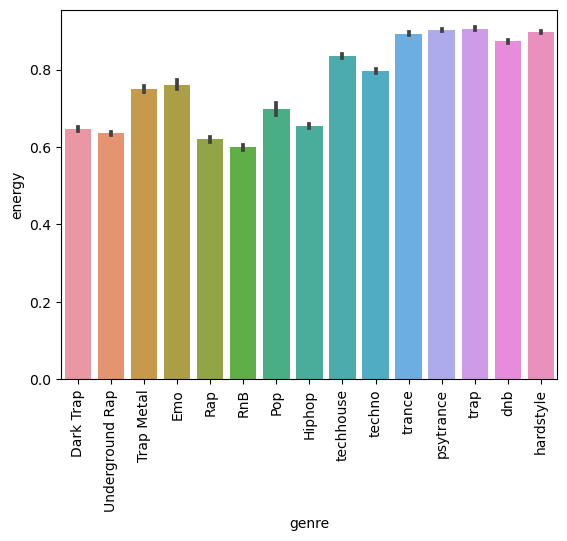

In [19]:
sns.barplot(x='genre',y='energy',data=data)
plt.xticks(rotation = 90)
plt.show()

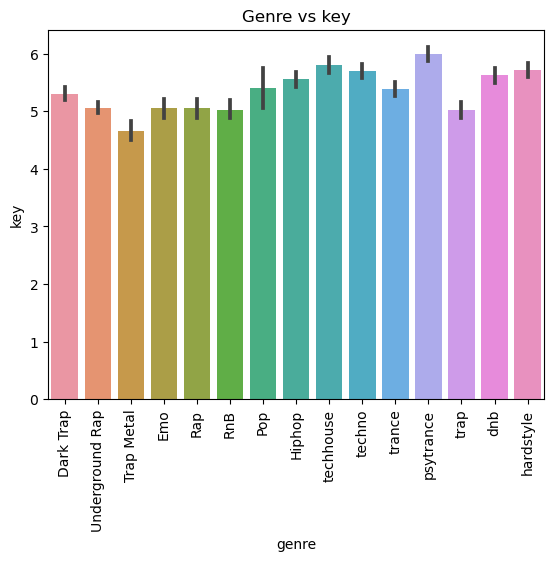

In [20]:
sns.barplot(x='genre',y='key',data=data)
plt.title('Genre vs key')
plt.xticks(rotation = 90)
plt.show()

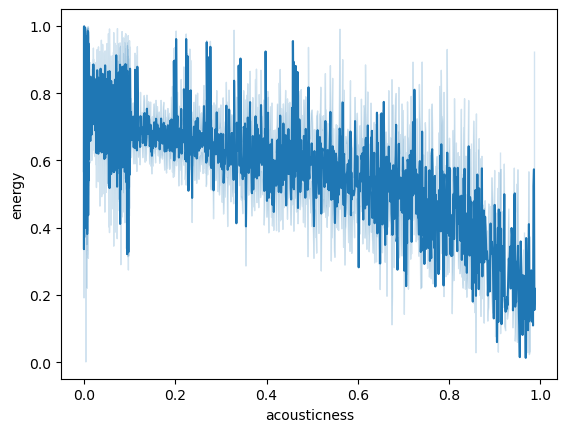

In [21]:
sns.lineplot(x='acousticness',y='energy',data=data)
plt.show()

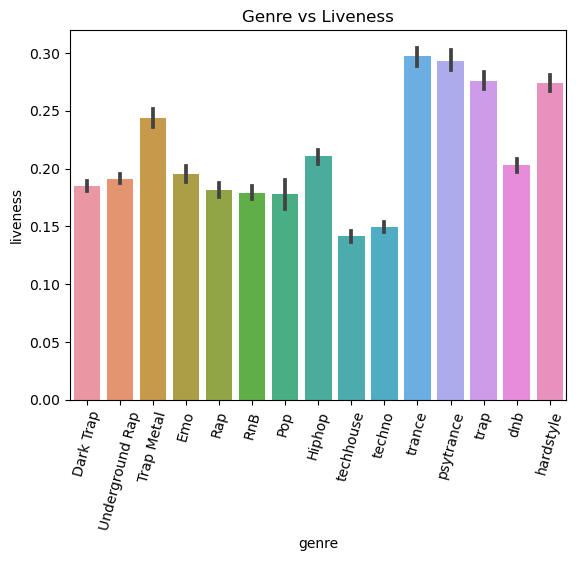

In [22]:
sns.barplot(x='genre',y='liveness',data=data)
plt.title('Genre vs Liveness')
plt.xticks(rotation=75)
plt.show()

In [23]:
from sklearn.preprocessing import StandardScaler


In [24]:
scaler = StandardScaler()
x = data.drop('genre',axis=1)
x_scaled = scaler.fit_transform(x)
X = pd.DataFrame(x_scaled,columns = x.columns)
X

danceability    energy       key  loudness      mode  speechiness  \
0          1.223608  0.280079 -0.919298 -0.305514  0.905517     2.246552   
1          0.508480 -1.466185  0.717318 -0.259954  0.905517    -0.453057   
2          1.344924  0.709845 -0.100990  0.572039  0.905517    -0.588592   
3         -1.043093  0.100557 -1.464837  0.596860  0.905517    -0.266002   
4          1.012900 -0.753535 -0.919298 -0.408876  0.905517     1.239945   
...             ...       ...       ...       ...       ...          ...   
42300     -0.711069 -0.378170 -0.373759  0.447937  0.905517    -0.841432   
42301     -0.781305  0.029836 -1.464837 -0.495237 -1.104341    -0.702727   
42302     -1.777377  0.318160  0.717318  1.143588  0.905517    -0.682119   
42303     -1.036708  0.862167  0.171779  0.574079 -1.104341    -0.771683   
42304     -0.704684  0.992729  0.990087  0.205174  0.905517    -0.594933   

       acousticness  instrumentalness  liveness   valence     tempo  \
0         -0.212853         -0.727231 -0.902637  0.136790  0.398876   
1          1.784518         -0.763370 -0.547231 -0.999586 -1.358564   
2         -0.482135         -0.763359  0.899456 -1.363655  2.959861   
3         -0.424181         -0.763370 -0.570013 -0.780887  1.655485   
4          0.707390         -0.763370 -0.273841  1.003008  0.021554   
...             ...               ...       ...       ...       ...   
42300     -0.378520         -0.762440 -0.530144  0.158231  0.106480   
42301     -0.431205         -0.763321 -0.051712  0.111061  0.102915   
42302     -0.410717         -0.762718  0.973499 -0.999586  0.312902   
42303     -0.559694         -0.683540 -0.891815  0.561323  0.107696   
42304     -0.551855         -0.763223  1.138672 -0.956704  0.317599   

       time_signature  duration_min  
0            0.102184     -1.226992  
1            0.102184     -0.256796  
2            0.102184     -1.476787  
3           -3.624453     -1.235520  
4            0.102184     -1.239046  
...               ...           ...  
42300        0.102184      0.178154  
42301        0.102184     -0.395836  
42302        0.102184     -0.155822  
42303        0.102184      0.702570  
42304        0.102184     -0.861576  

[42305 rows x 13 columns]

In [25]:
Y = data['genre']

In [26]:
from sklearn.cluster import KMeans

In [27]:
sse = []
for k in range(1,7):
    km = KMeans(n_clusters = k)
    km.fit(X)
    sse.append(km.inertia_)
    
    

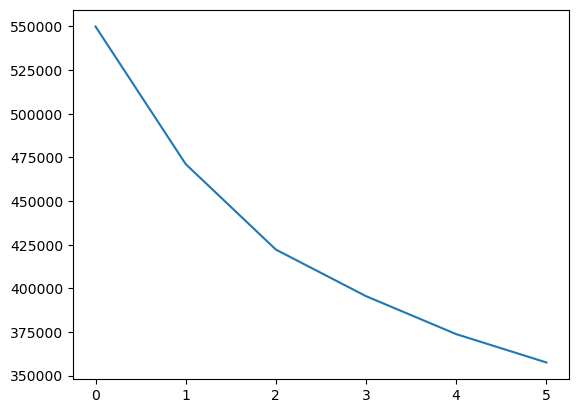

In [28]:
plt.plot(sse)

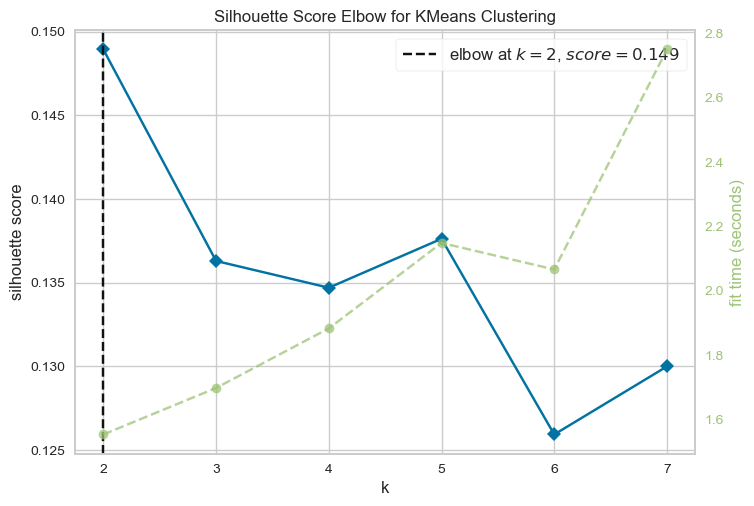

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [29]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(2,8),metric='silhouette')
visualizer.fit(X)
visualizer.show()

In [30]:
from sklearn.metrics import silhouette_score
for k in range(2,8):
    km = KMeans(n_clusters = k,max_iter =50)
    km.fit(X)
    score = silhouette_score(X,km.labels_)
    print('k=',k,': silhouette-score = ',score)

k= 2 : silhouette-score =  0.1488078671653208
k= 3 : silhouette-score =  0.13629164792033135
k= 4 : silhouette-score =  0.13466196751886092
k= 5 : silhouette-score =  0.13761872005052053
k= 6 : silhouette-score =  0.12919648537794978
k= 7 : silhouette-score =  0.12127893927576477


In [31]:
labels =[]
from sklearn.cluster import KMeans

kmeans_final = KMeans(n_clusters=3, max_iter=50)
kmeans_final.fit(X)
labels = kmeans_final.labels_

In [32]:
Labels = pd.DataFrame(labels,columns=['KM_labels'])
Labels

KM_labels
0              0
1              0
2              1
3              1
4              0
...          ...
42300          1
42301          1
42302          1
42303          1
42304          1

[42305 rows x 1 columns]

In [34]:
data['Km_labels'] = kmeans_final.labels_

In [35]:
data.head()

danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.831   0.814    2    -7.364     1       0.4200        0.0598   
1         0.719   0.493    8    -7.230     1       0.0794        0.4010   
2         0.850   0.893    5    -4.783     1       0.0623        0.0138   
3         0.476   0.781    0    -4.710     1       0.1030        0.0237   
4         0.798   0.624    2    -7.668     1       0.2930        0.2170   

   instrumentalness  liveness  valence    tempo  time_signature      genre  \
0          0.013400    0.0556   0.3890  156.985               4  Dark Trap   
1          0.000000    0.1180   0.1240  115.080               4  Dark Trap   
2          0.000004    0.3720   0.0391  218.050               4  Dark Trap   
3          0.000000    0.1140   0.1750  186.948               3  Dark Trap   
4          0.000000    0.1660   0.5910  147.988               4  Dark Trap   

   duration_min  Km_labels  
0      2.075650          0  
1      3.740450          0  
2      1.647017          1  
3      2.061017          1  
4      2.054967          0

Text(0.5, 1.0, 'Danceability vs Duration (Minutes)')

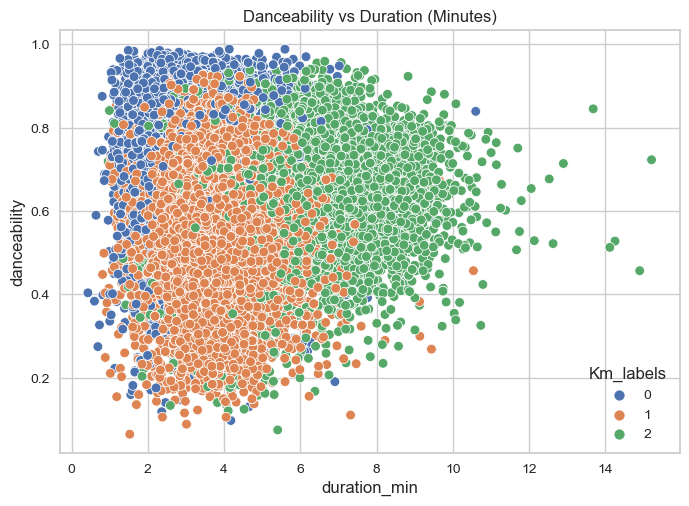

In [39]:
sns.scatterplot(x = 'duration_min',y = 'danceability', data = data, hue = 'Km_labels',palette='deep')
plt.title('Danceability vs Duration (Minutes)')


Text(0.5, 1.0, 'Danceability vs Energy')

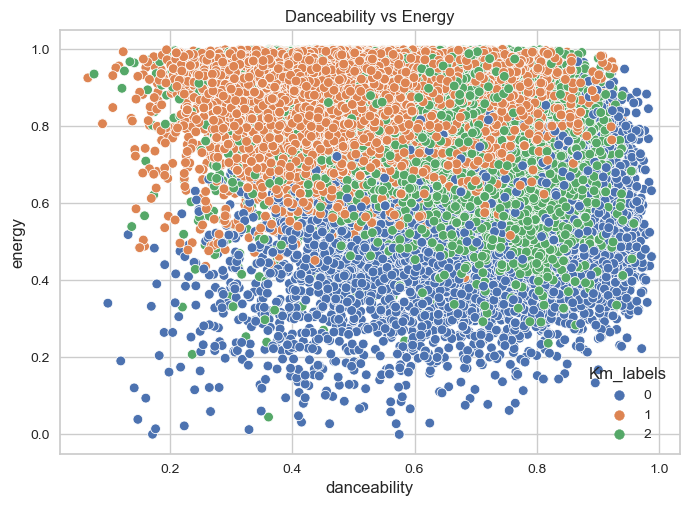

In [40]:
sns.scatterplot(x = 'danceability',y = 'energy', data = data, hue = 'Km_labels',palette='deep')
plt.title('Danceability vs Energy')

Text(0.5, 1.0, 'Loudness vs Energy')

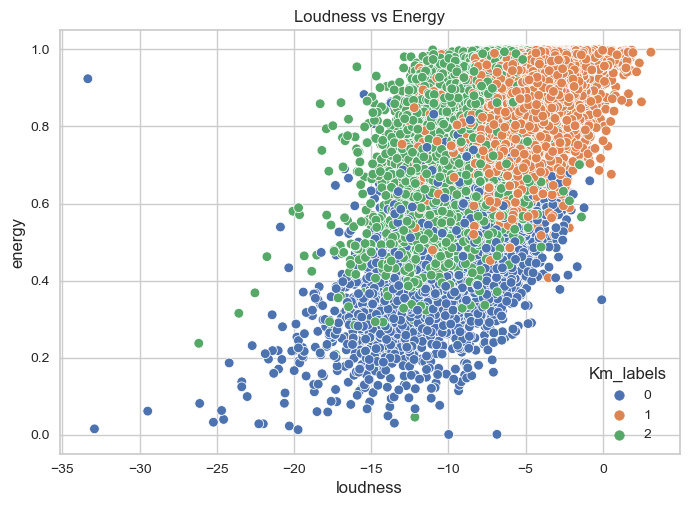

In [41]:
sns.scatterplot(x = 'loudness',y = 'energy', data = data, hue = 'Km_labels',palette='deep')
plt.title('Loudness vs Energy')

Text(0.5, 1.0, 'Acousticness Vs Instrumentalness')

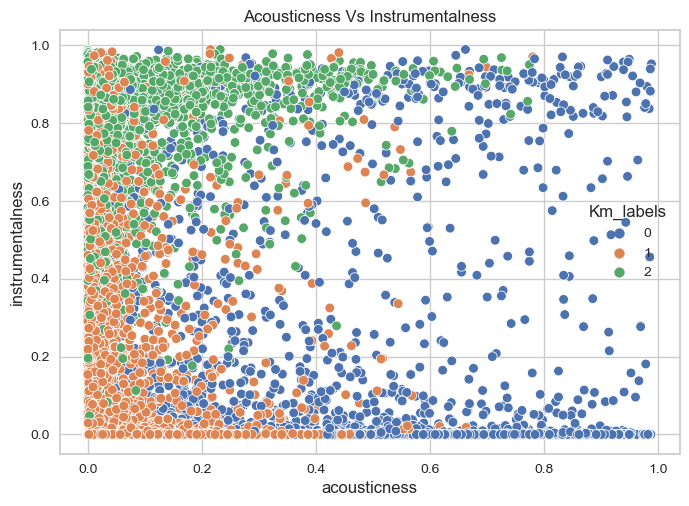

In [42]:
sns.scatterplot(x = 'acousticness',y = 'instrumentalness', data = data, hue = 'Km_labels',palette='deep')
plt.title('Acousticness Vs Instrumentalness')

In [44]:
from sklearn.cluster import Birch

In [45]:
for k in range(2,7):
    birch = Birch(n_clusters=k)
    birch_labels = birch.fit_predict(X)
    score = silhouette_score(X,birch_labels)
    
    print('When n_cluster = ',k,', silhouette score =',score)
    

When n_cluster =  2 , silhouette score = 0.11692403118668568
When n_cluster =  3 , silhouette score = 0.12469986216026453
When n_cluster =  4 , silhouette score = 0.10337330194309047
When n_cluster =  5 , silhouette score = 0.0973014157968317
When n_cluster =  6 , silhouette score = 0.09890871351020593


In [46]:
birch_final = Birch(n_clusters = 3)
birch_final.fit(X)

Birch()

In [47]:
Labels['Birch_label'] = birch_final.labels_

In [48]:
data['Birch_label'] = birch_final.labels_

In [52]:
from sklearn.cluster import AgglomerativeClustering

In [53]:
for k in range(2,7):
    ac = AgglomerativeClustering(n_clusters = k)
    ac_label = ac.fit_predict(X)
    score = silhouette_score(X,ac_label)
    
    print('When n_cluster = ',k,', silhouette score =',score)

When n_cluster =  2 , silhouette score = 0.11996775813971822
When n_cluster =  3 , silhouette score = 0.0996589326209318
When n_cluster =  4 , silhouette score = 0.10393931132304714
When n_cluster =  5 , silhouette score = 0.10233541909190752
When n_cluster =  6 , silhouette score = 0.09194464740741234


In [55]:
ac_final = AgglomerativeClustering(n_clusters =3)
ac_final.fit(X)


AgglomerativeClustering(n_clusters=3)

In [56]:
data['Ac_labels'] = ac_final.labels_
Labels['Ac_labels'] = ac_final.labels_

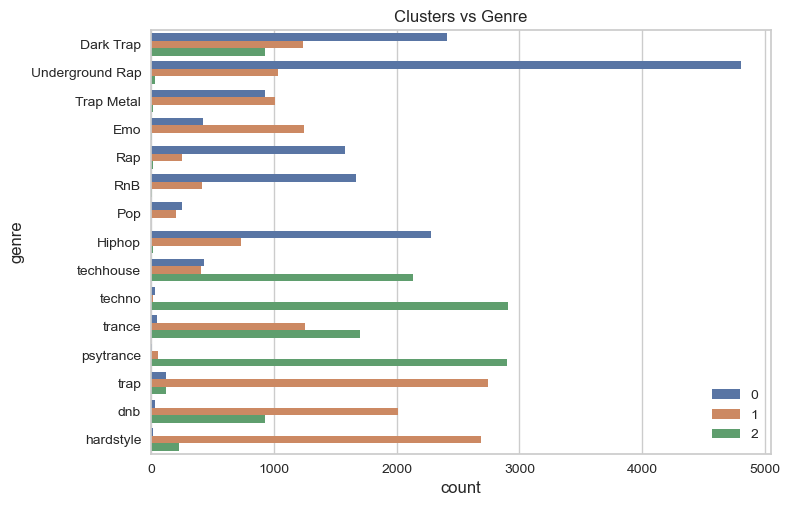

In [57]:
sns.countplot(y='genre', data=data, hue='Km_labels', palette='deep') 
plt.title('Clusters vs Genre')
plt.legend()
plt.show()

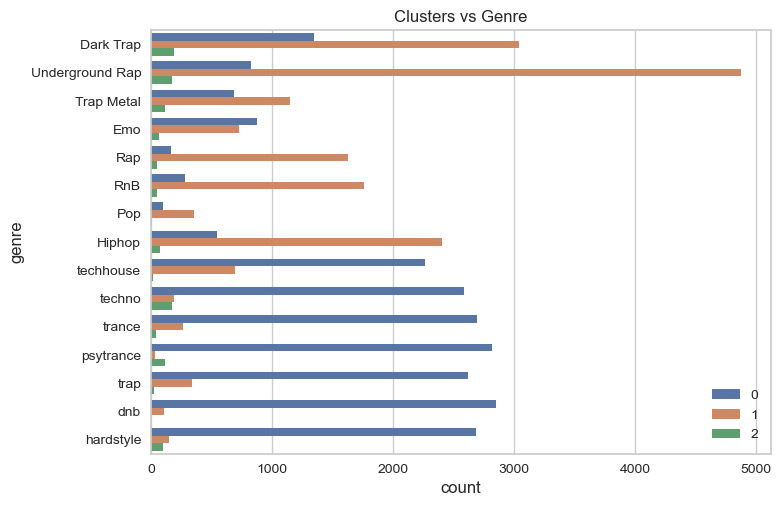

In [58]:
sns.countplot(y='genre', data=data, hue='Birch_label', palette='deep') 
plt.title('Clusters vs Genre')
plt.legend()
plt.show()

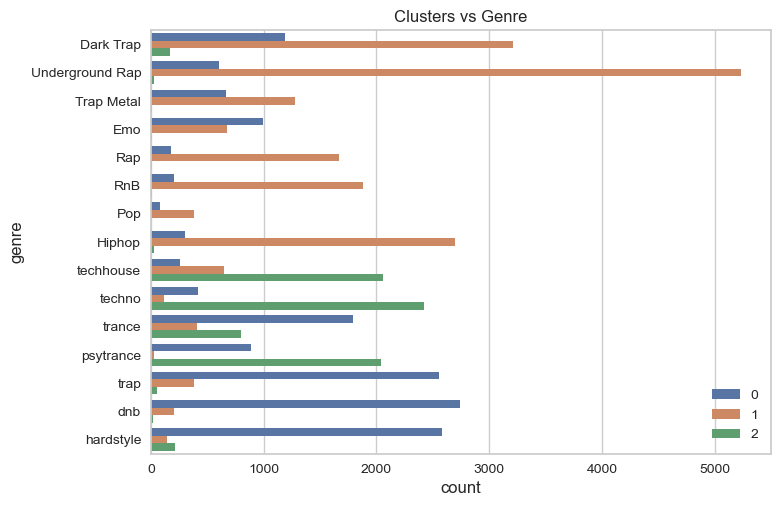

In [60]:
sns.countplot(y='genre', data=data, hue='Ac_labels', palette='deep') 
plt.title('Clusters vs Genre')
plt.legend()
plt.show()